In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
pip install tensorflow keras matplotlib numpy scikit-learn


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)  # Resize images to same size

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/DaAta set',
    target_size=img_size,
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/DaAta set',
    target_size=img_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 8s/step - accuracy: 0.5544 - loss: 1.2618 - val_accuracy: 0.5385 - val_loss: 0.6446
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 607ms/step - accuracy: 0.6637 - loss: 0.5650 - val_accuracy: 1.0000 - val_loss: 0.5607
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 599ms/step - accuracy: 0.9360 - loss: 0.4951 - val_accuracy: 0.9615 - val_loss: 0.3839
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.3151 - val_accuracy: 0.9615 - val_loss: 0.2367
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 620ms/step - accuracy: 1.0000 - loss: 0.1276 - val_accuracy: 1.0000 - val_loss: 0.1375
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 775ms/step - accuracy: 0.9768 - loss: 0.0999 - val_accuracy: 0.9615 - val_loss: 0.1589
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 604ms/step - accuracy: 0.9941 - loss: 0.0418 - val_accuracy: 0.9615 - val_loss: 0.0561
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 603ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 1.0000 - val_loss: 0.01

In [7]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 1.0000 - loss: 0.0275
Validation Accuracy: 1.00


In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prep_image(img_path, img_size=(128,128)):
    img = image.load_img(img_path, target_size=img_size)  # Load and resize
    img_array = image.img_to_array(img)                   # Convert to array
    img_array = img_array / 255.0                          # Normalize (same as training)
    img_array = np.expand_dims(img_array, axis=0)         # Add batch dimension
    return img_array


In [10]:
img_path = '/content/drive/MyDrive/DaAta set/Real/real_10.jpg'
processed_img = load_and_prep_image(img_path)

prediction = model.predict(processed_img)  # Model outputs a value between 0 and 1

if prediction < 0.5:
    print("The image is predicted to be REAL.")
else:
    print("The image is predicted to be AI-generated.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The image is predicted to be AI-generated.


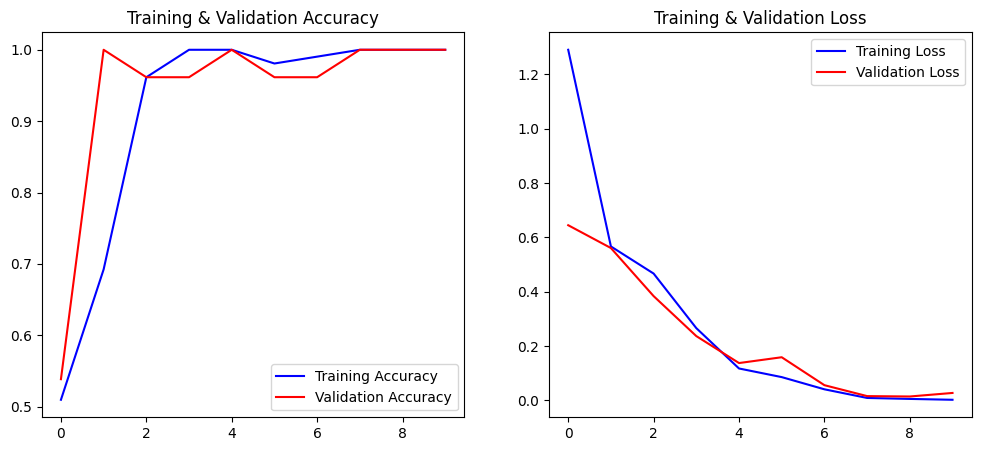

In [11]:
import matplotlib.pyplot as plt

# Suppose you saved the history like this:
# history = model.fit(...)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


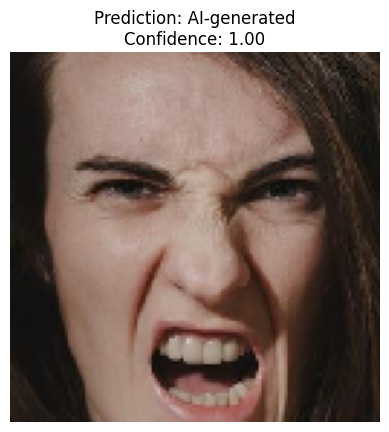

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def visualize_prediction(img_path, model, img_size=(128,128)):
    img = image.load_img(img_path, target_size=img_size)
    plt.imshow(img)
    plt.axis('off')

    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]

    label = "AI-generated" if prediction > 0.5 else "Real"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    plt.title(f"Prediction: {label}\nConfidence: {confidence:.2f}")
    plt.show()

# Example usage:
visualize_prediction('/content/drive/MyDrive/DaAta set/Real/real_11.jpg', model)
